## Классификация данных однослойным персептроном

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Построение обучающей выборки

#### Зададим точки проверочной выборки

In [2]:
# Координаты точек и их классы
validation_points = [[0, 0], [1, 1], [-1, 1], [0, 1]]
validation_labels = [1, 2, 3, 4]

# Обозначаем бинарное представление
labels_as_binary = {
    1: [1, 0, 0, 0],
    2: [0, 1, 0, 0],
    3: [0, 0, 1, 0],
    4: [0, 0, 0, 1],
}

#### Построим точки обучающей выборки вокруг них

In [3]:
# Создадим обучающий набор из проверочного простым копированием
training_points = validation_points * 100
training_labels = validation_labels * 100

# Преобразуем в массивы Numpy
training_points = np.array(training_points)
training_labels = np.array(training_labels)

# К каждой точке обучающего набора добавим случайное смещение
training_points = training_points + np.random.normal(0, 0.1, (100 * 4, 2))

#### Покажем полученный обучающий набор

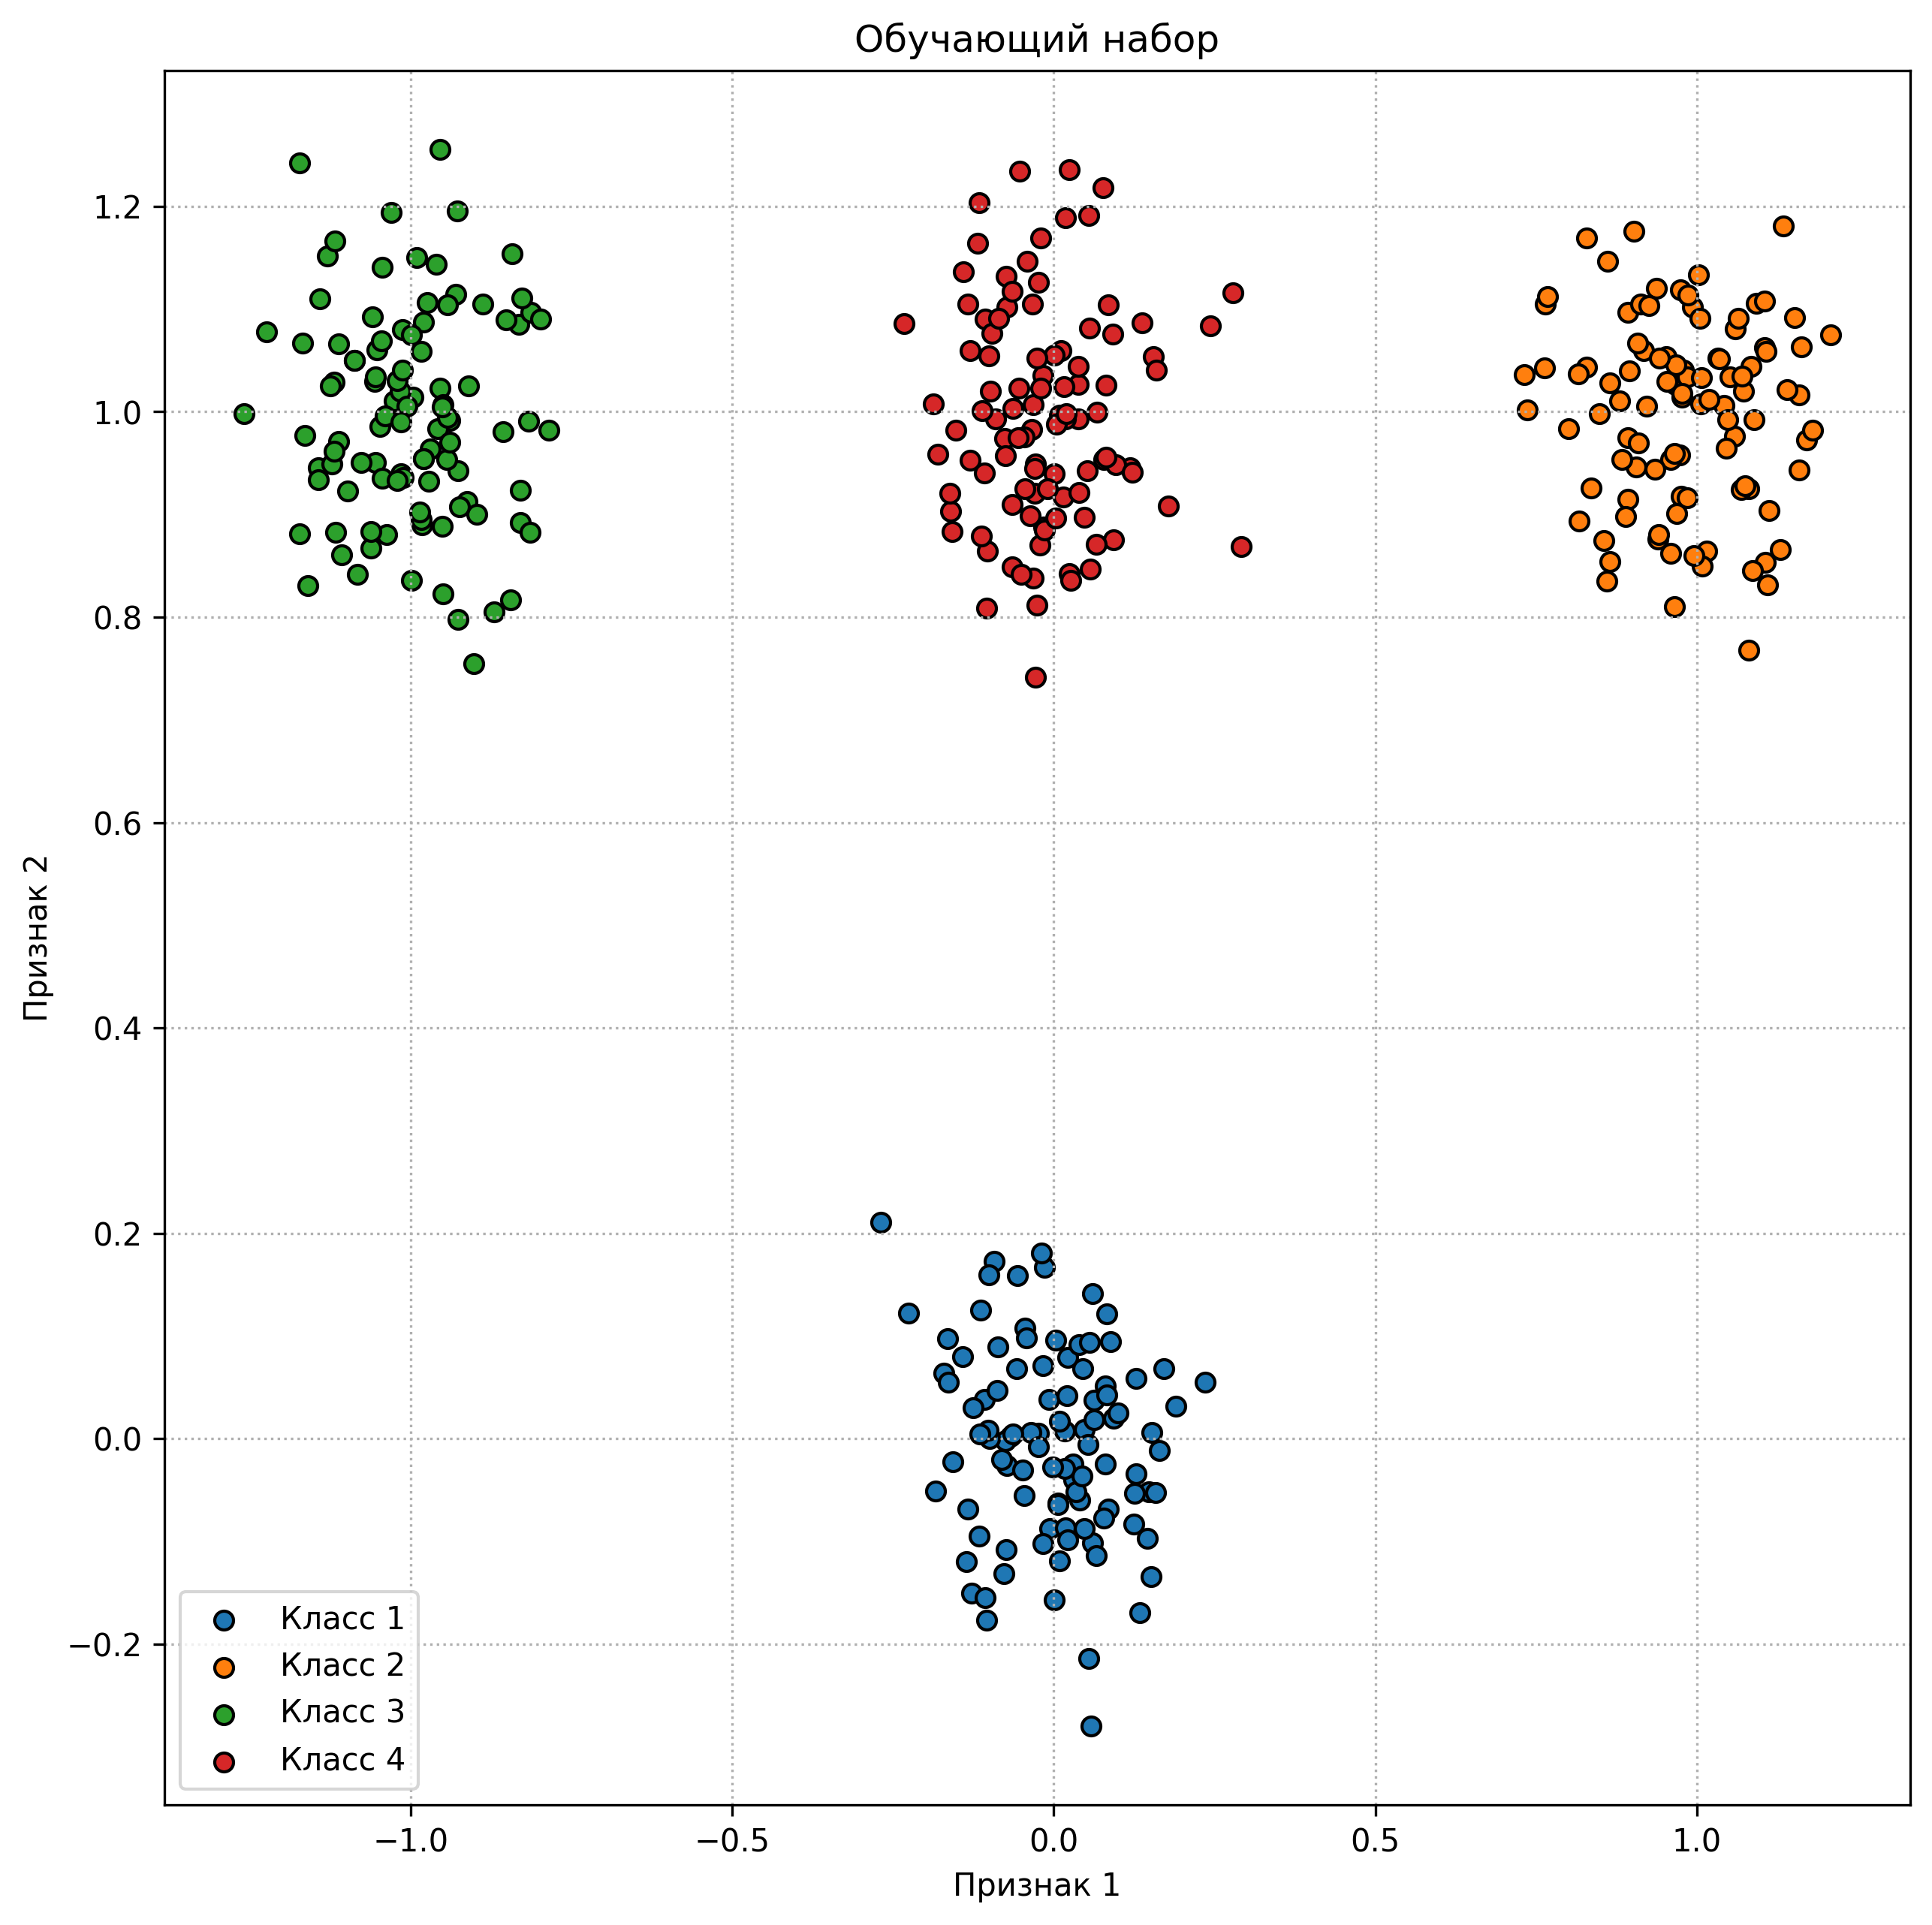

In [4]:
fig, ax = plt.subplots(figsize=(10, 10), dpi=300)
ax.set_title("Обучающий набор")
ax.set_xlabel("Признак 1")
ax.set_ylabel("Признак 2")
ax.grid(True, linestyle=":")

# Разбиваем по классам
class_1 = training_points[0::4]
class_2 = training_points[1::4]
class_3 = training_points[2::4]
class_4 = training_points[3::4]

# Рисуем каждый класс отдельно
ax.scatter(class_1[:, 0], class_1[:, 1], edgecolors="k")
ax.scatter(class_2[:, 0], class_2[:, 1], edgecolors="k")
ax.scatter(class_3[:, 0], class_3[:, 1], edgecolors="k")
ax.scatter(class_4[:, 0], class_4[:, 1], edgecolors="k")

# Легенда для каждого класса
ax.legend(["Класс 1", "Класс 2", "Класс 3", "Класс 4"])

plt.show()
plt.close()

### Построим персептрон с одним скрытым слоем

In [5]:
class Perceptron:
    def __init__(self):
        # Количество входных значений (координат точки)
        self.input_size = 2
        # Количество скрытых нейронов
        self.hidden_size = 5
        # Количество выходных значений (классов в бинарном представлении)
        self.output_size = 4
        # Темп обучения
        self.learning_rate = 0.01

        # Инициализация весов сети случайным образом
        self.weights_input_hidden = 2 * np.random.random((self.input_size, self.hidden_size)) - 1
        self.weights_hidden_output = 2 * np.random.random((self.hidden_size, self.output_size)) - 1

    # Функция активации sigmoid
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    # Производная функция sigmoid
    def sigmoid_derivative(self, x):
        return x * (1 - x)

    # Одна итерация обучения
    def train(self, points, labels):
        # Прямое распространение
        hidden_layer_input = np.dot(points, self.weights_input_hidden)
        hidden_layer_output = self.sigmoid(hidden_layer_input)
        output_layer_input = np.dot(hidden_layer_output, self.weights_hidden_output)
        predicted_output = self.sigmoid(output_layer_input)

        # Ошибка
        output_error = labels - predicted_output

        # Обратное распространение
        output_delta = output_error * self.sigmoid_derivative(predicted_output)
        hidden_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(hidden_layer_output)

        # Обновление весов
        self.weights_hidden_output += hidden_layer_output.T.dot(output_delta) * self.learning_rate
        self.weights_input_hidden += points.T.dot(hidden_delta) * self.learning_rate

    # Прямое распространение
    def run(self, points):
        hidden_layer_input = np.dot(points, self.weights_input_hidden)
        hidden_layer_output = self.sigmoid(hidden_layer_input)
        output_layer_input = np.dot(hidden_layer_output, self.weights_hidden_output)
        predicted = self.sigmoid(output_layer_input)
        return predicted

### Обучение персептрона

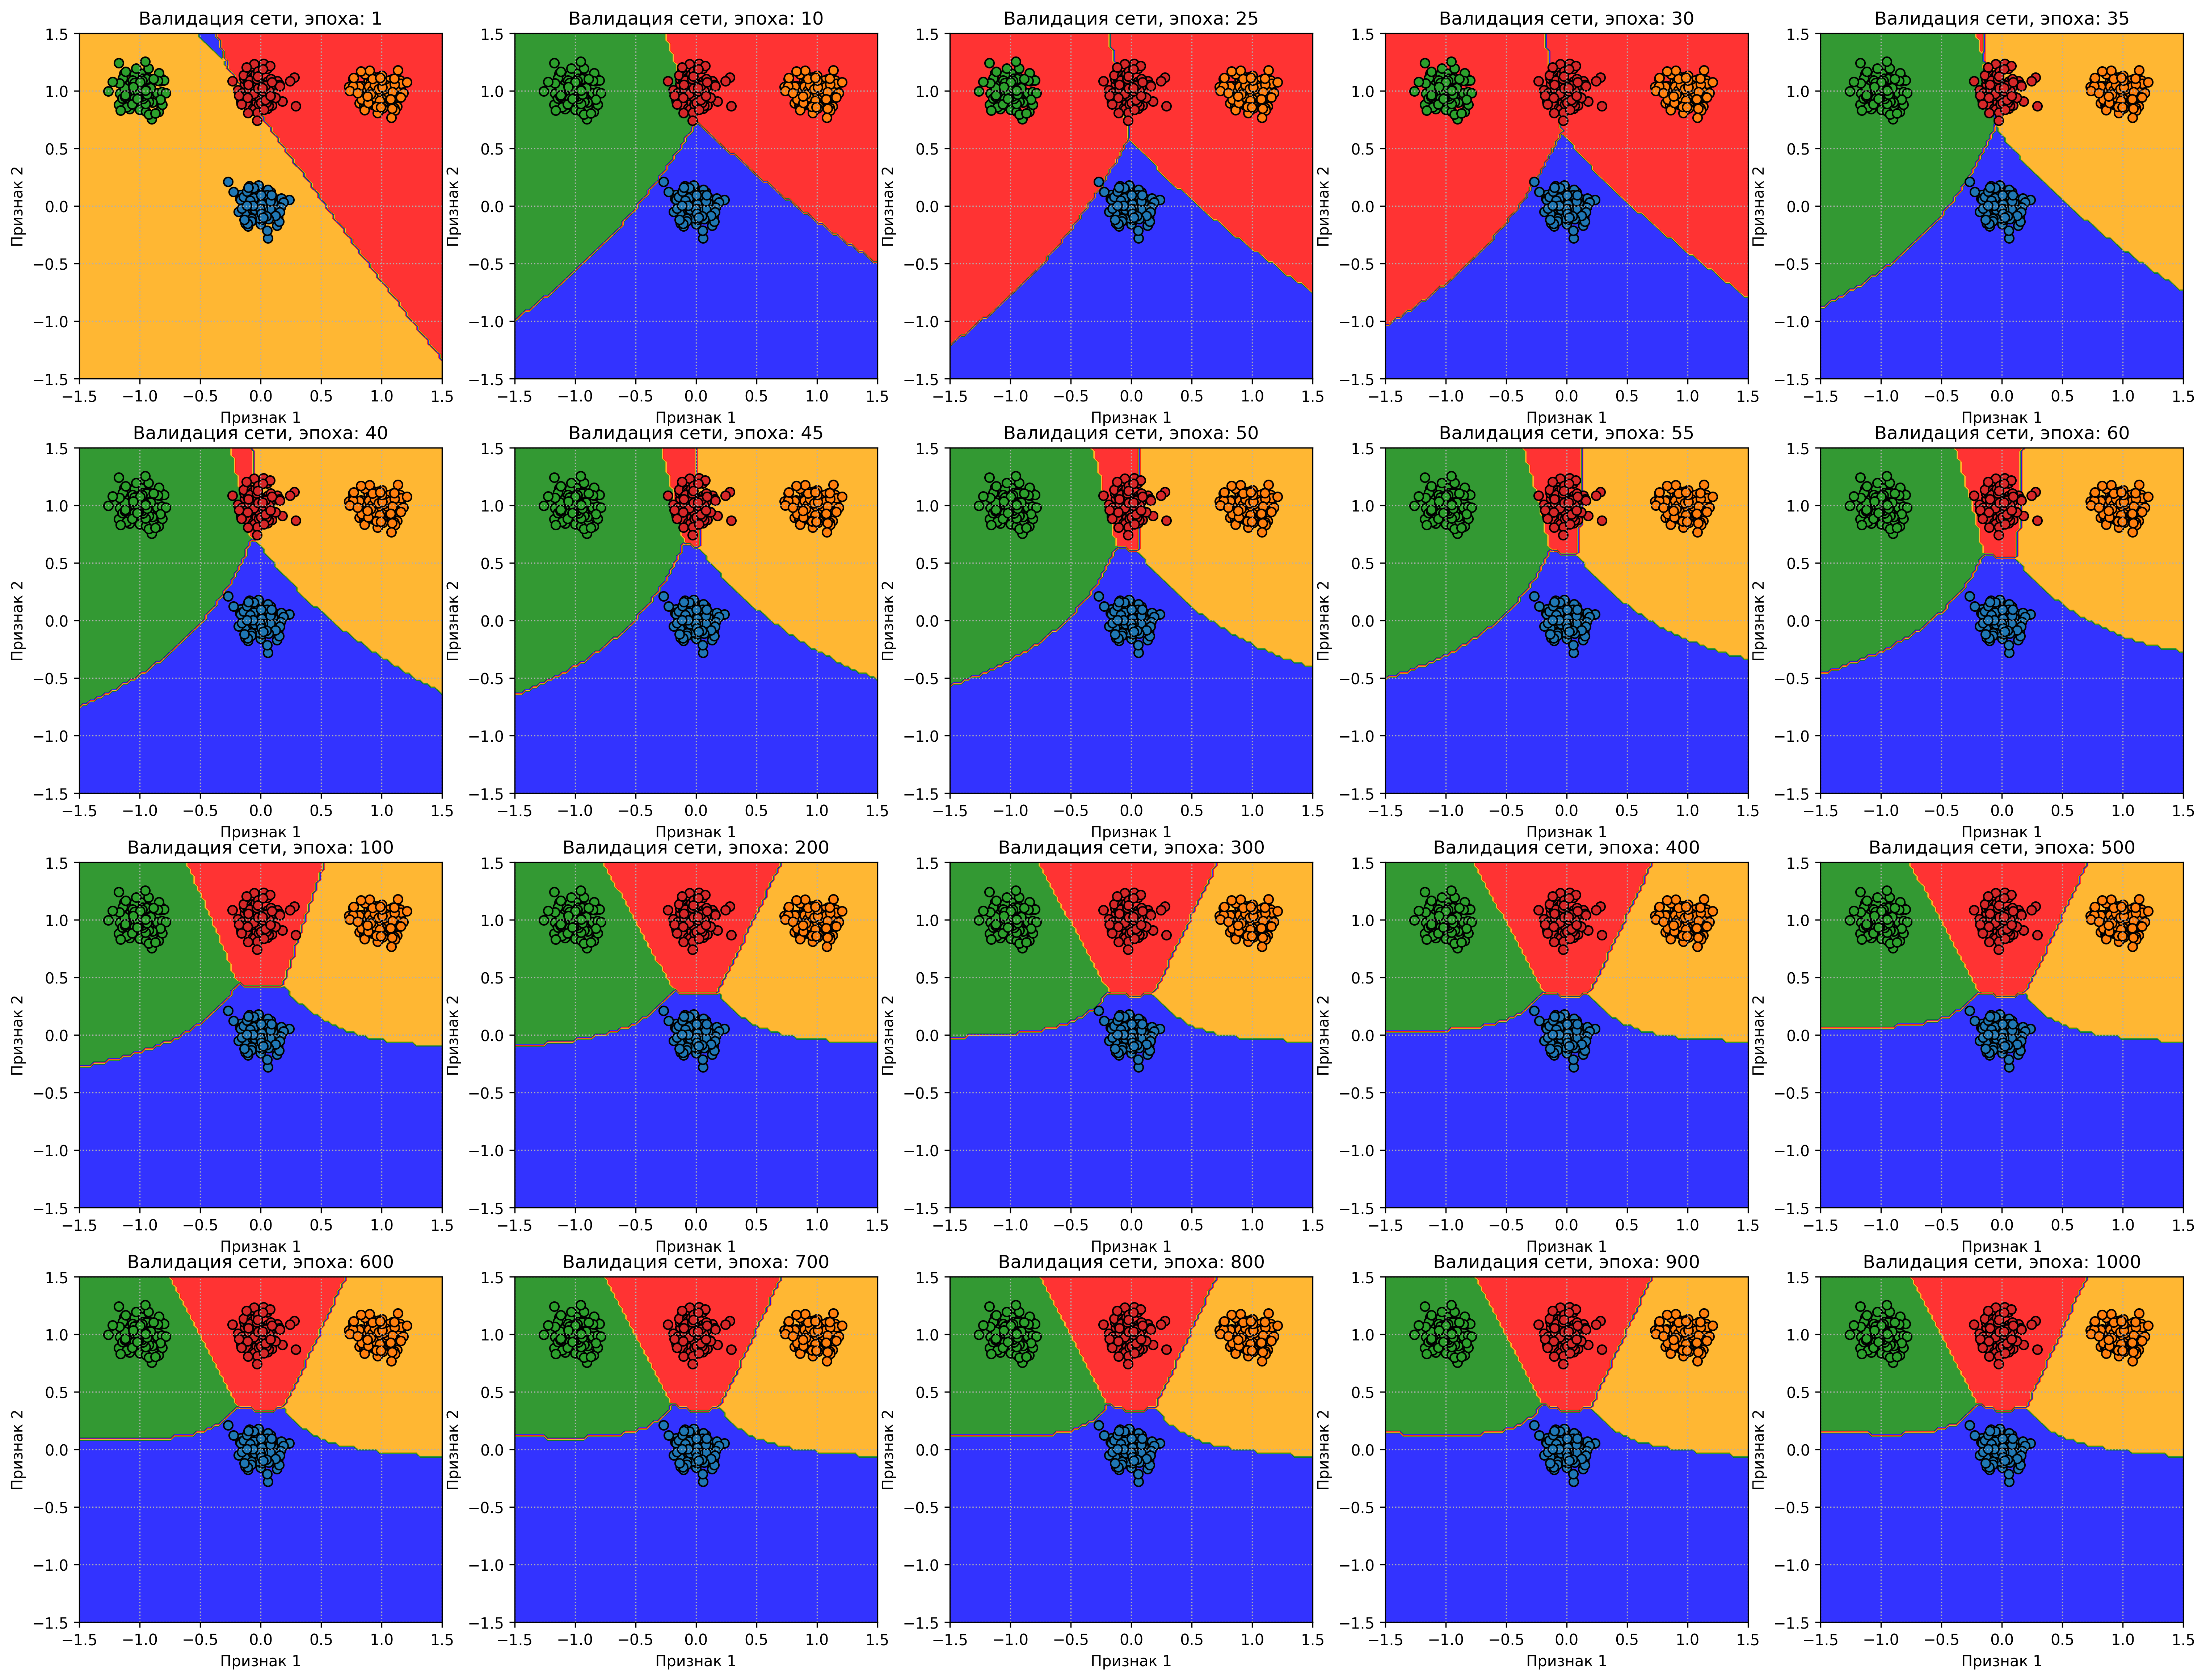

In [6]:
# Преобразуем значения классов в бинарное представление
training_labels_binary = [labels_as_binary.get(label) for label in training_labels]

# Преобразуем в массив NumPy
training_labels_binary = np.array(training_labels_binary)

# Узлы квадратной сетки визуализации
nodes = np.linspace(-1.5, +1.5, 100)

# Сетка для проведения визуализации
grid_x, grid_y = np.meshgrid(nodes, nodes)

# Сетка в последовательном представлении
grid_xy = np.vstack([grid_x.ravel(), grid_y.ravel()]).T

# Номера избранных итераций для визуализации
iterations_indexes = [0, 9, 24, 29, 34, 39, 44, 49, 54, 59, 99,
                      199, 299, 399, 499, 599, 699, 799, 899, 999]

# Данные предсказаний для каждой выбранной итерации
iterations_data = []

# Создаем персептрон
network = Perceptron()

# Обучаем сеть на 1000 итераций
for epoch in range(1000):
    # Обучение персептрона
    network.train(training_points, training_labels_binary)
    
    # Сохранение данных избранных итераций
    if epoch in iterations_indexes:
        # Классифицируем точки сетки
        prediction = network.run(grid_xy)
        # Преобразуем в представления класса
        labels = np.argmax(prediction, axis=1) + 1
        # Сохраняем данные предсказаний для сетки
        iterations_data.append(labels)

# Постороим групповой граффик
fig, ax = plt.subplots(ncols=5, nrows=4, figsize=(25, 19), dpi=300)
ax = ax.flatten()

# Палитра цветов контурного графика
palette = ["blue", "green", "orange", "red"]

for index, data in enumerate(iterations_data):
    ax[index].set_title(f"Валидация сети, эпоха: {iterations_indexes[index] + 1}")
    ax[index].set_xlabel("Признак 1")
    ax[index].set_ylabel("Признак 2")
    ax[index].grid(True, linestyle=":")
    
    # Контурный график
    ax[index].contourf(grid_x, grid_y,
                       data.reshape(grid_x.shape),
                       colors=palette,
                       alpha=0.8)

    # Рисуем каждый класс отдельно
    ax[index].scatter(class_1[:, 0], class_1[:, 1], edgecolors="k")
    ax[index].scatter(class_2[:, 0], class_2[:, 1], edgecolors="k")
    ax[index].scatter(class_3[:, 0], class_3[:, 1], edgecolors="k")
    ax[index].scatter(class_4[:, 0], class_4[:, 1], edgecolors="k")

plt.show()
plt.close()